In [77]:
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

import os
import sys
import copy
import pandas as pd
import time
from pathlib import Path
import argparse
import numpy as np


from util.VisualizeDataset import VisualizeDataset
from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.TemporalAbstraction import CategoricalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation
from Chapter4.TextAbstraction import TextAbstraction

# Read the result from the previous chapter, and make sure the index is of the type datetime.
DATA_PATH = Path('./intermediate_datafiles/')
DATASET_FNAME = 'chapter3_result_final.csv'
RESULT_FNAME = 'chapter4_result.csv'

figure_path = os.path.abspath('figures/ch_4_1')

In [231]:
def plot_frequencies(data_table, columns, match='like', display='line',size='',title=''):
    plt.xlabel('xlabel', fontsize=0.5)

    point_displays = ['+', 'x'] #'*', 'd', 'o', 's', '<', '>']
    line_displays = ['-'] #, '--', ':', '-.']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    names = list(data_table.columns)

    # Create subplots if more columns are specified.
    if len(columns) > 1:
        f, xar = plt.subplots(len(columns), sharex=True, sharey=False)
    else:
        f, xar = plt.subplots()
        xar = [xar]

    if title != '':
        f.suptitle(title)

    f.subplots_adjust(hspace=0.4)
    f.set_figwidth(10)

    xfmt = md.DateFormatter('%H:%M')

    # xar[0].set_prop_cycle(color=['#7BC8F6'])
    xar[0].set_prop_cycle(color=['#04D8B2'])
    xar[1].set_prop_cycle(color=['#06C2AC'])
    xar[2].set_prop_cycle(color=['#008080'])
    xar[3].set_prop_cycle(color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])

    # Pass through the columns specified.
    for i in range(0, len(columns)):
        xar[i].xaxis.set_major_formatter(xfmt)
        
        if match[i] == 'exact':
            relevant_cols = [columns[i]]
        elif match[i] == 'like':
            relevant_cols = [name for name in names if columns[i] == name[0:len(columns[i])]]
        else:
            raise ValueError("Match should be 'exact' or 'like' for " + str(i) + ".")

        max_values = []
        min_values = []

        print(relevant_cols)

        # Pass through the relevant columns.
        for j in range(0, len(relevant_cols)):
            # Create a mask to ignore the NaN and Inf values when plotting:
            mask = data_table[relevant_cols[j]].replace([np.inf, -np.inf], np.nan).notnull()
            max_values.append(data_table[relevant_cols[j]][mask].max())
            min_values.append(data_table[relevant_cols[j]][mask].min())

            # Display point, or as a line
            if display[i] == 'points':
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            point_displays[j%len(point_displays)])
            else:
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            line_displays[j%len(line_displays)],linewidth="0.5")

        xar[i].tick_params(axis='y', labelsize=7)

        xar[i].yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
        xar[3].yaxis.set_major_locator( plticker.MultipleLocator(base=1.0))        
        
        xar[i].legend(relevant_cols, fontsize='xx-small', numpoints=1, loc='upper center',
                        bbox_to_anchor=(0.5, 1.4), ncol=len(relevant_cols), fancybox=False, shadow=False)

        xar[i].set_ylim([min(min_values) - 0.1*(max(max_values) - min(min_values)),
                            max(max_values) + 0.1*(max(max_values) - min(min_values))])

    # xar[0].set_ylabel('YLabel', {loc='top'})
    xar[0].set_ylabel('highest amplitud frequency')
    xar[0].yaxis.set_label_coords(-.05, -1)
    
    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.xlabel('time')
    # plt.ylabel('highest amplitud frequency',{pos='top'})
    

    xar[0].xaxis.set_label_coords(.9, -.1)
    # set the spacing between subplots
    plt.subplots_adjust(hspace=0.6)
    plt.ioff()
    
    plt.linewidth=10

    f.patch.set_facecolor('xkcd:white')

    return f


In [152]:
#Same as plot_frequencies but plotting all frequencies in one plot. 
def plot_frequencies2(data_table, columns, match='like', display='line',size='',title=''):
    plt.xlabel('xlabel', fontsize=0.5)

    point_displays = ['+', 'x'] #'*', 'd', 'o', 's', '<', '>']
    line_displays = ['-'] #, '--', ':', '-.']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    names = list(data_table.columns)

    f, xar = plt.subplots(2, sharex=True, sharey=False)

    if title != '':
        f.suptitle(title)

    f.subplots_adjust(hspace=0.4)
    f.set_figwidth(10)

    xfmt = md.DateFormatter('%H:%M')

    xar[0].xaxis.set_major_formatter(xfmt)
    xar[0].set_prop_cycle(color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])

    xar[1].xaxis.set_major_formatter(xfmt)
    xar[1].set_prop_cycle(color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])    

    relevant_cols = []
    for i in range(0,len(columns)):
        relevant_cols.append([name for name in names if columns[i] == name[0:len(columns[i])]][0])

    print(relevant_cols)
    labelCols = ['labelOnTable', 'labelSitting', 'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving', 'labelEating', 'labelRunning']
    
    max_values0 = []
    max_values1 = []
    min_values0 = []
    min_values1 = []
    
    # Pass through the relevant columns.
    for j in range(0, len(relevant_cols)):
        # Create a mask to ignore the NaN and Inf values when plotting:
        mask0 = data_table[relevant_cols[j]].replace([np.inf, -np.inf], np.nan).notnull()
        max_values0.append(data_table[relevant_cols[j]][mask0].max())
        min_values0.append(data_table[relevant_cols[j]][mask0].min())

        xar[0].plot(data_table.index[mask0], data_table[relevant_cols[j]][mask0], line_displays[j%len(line_displays)],linewidth="0.5")

    for k in range(0,len(labelCols)):
        mask1 = data_table[labelCols[k]].replace([np.inf, -np.inf], np.nan).notnull()
        min_values1.append(data_table[labelCols[k]][mask1].min())        
        max_values1.append(data_table[labelCols[k]][mask1].max())
        xar[1].plot(data_table.index[mask1], data_table[labelCols[k]][mask1], point_displays[k%len(point_displays)])

    xar[0].tick_params(axis='y', labelsize=7)
    xar[1].tick_params(axis='y', labelsize=7)

    xar[0].yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
    xar[1].yaxis.set_major_locator(plticker.MultipleLocator(base=1.0))        
    
    xar[0].legend(relevant_cols, fontsize='xx-small', numpoints=1, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(relevant_cols), fancybox=False, shadow=False)
    xar[1].legend(labelCols, fontsize='xx-small', numpoints=1, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(labelCols), fancybox=False, shadow=False)

    xar[0].set_ylim([min(min_values0) - 0.1*(max(max_values0) - min(min_values0)), max(max_values0) + 0.1*(max(max_values0) - min(min_values0))])
    xar[1].set_ylim([min(min_values1) - 0.1*(max(max_values1) - min(min_values1)), max(max_values1) + 0.1*(max(max_values1) - min(min_values1))])

    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.xlabel('time')

    # set the spacing between subplots
    plt.subplots_adjust(hspace=0.4)
    plt.ioff()
    
    plt.linewidth=10

    f.patch.set_facecolor('xkcd:white')

    return f


In [2]:
start_time = time.time()
try:
    dataset = pd.read_csv(DATA_PATH / DATASET_FNAME, index_col=0)
    dataset.index = pd.to_datetime(dataset.index)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

In [3]:
dataset.head()

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,mag_watch_y,mag_watch_z,press_phone_pressure,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
2016-02-08 18:28:25.656222395,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,0.001668,...,58.998207,-23.318370,1029.041,-0.138962,0.675065,-0.020069,-0.084507,0.244688,-0.080517,0.053691
2016-02-08 18:28:25.906222395,-0.096204,0.168119,9.632371,9.551758,0.189616,1.514936,-0.008766,0.018608,-0.001691,0.002291,...,58.959727,-23.886958,1029.132,-0.142551,0.679169,-0.022941,-0.084407,0.244758,-0.081973,0.055435
2016-02-08 18:28:26.156222395,-0.091631,0.166526,9.636167,9.551339,0.194102,1.511228,-0.008963,0.018207,-0.002332,0.001881,...,58.133900,-25.272319,1029.282,-0.148400,0.683118,-0.027784,-0.086870,0.244484,-0.083680,0.053955
2016-02-08 18:28:26.406222395,-0.087132,0.167139,9.633979,9.550147,0.200357,1.504115,-0.008844,0.018436,-0.002050,0.001919,...,58.255560,-24.346528,1029.369,-0.151896,0.684830,-0.028696,-0.087881,0.245116,-0.081565,0.053181
2016-02-08 18:28:26.656222395,-0.093228,0.166913,9.628586,9.552066,0.200733,1.501253,-0.008886,0.018699,-0.002256,0.001889,...,59.248007,-23.400963,1029.268,-0.148518,0.683540,-0.028142,-0.086783,0.246322,-0.079858,0.054995


In [4]:
# Let us create our visualization class again.
DataViz = VisualizeDataset(figure_path)

# Compute the number of milliseconds covered by an instance based on the first two rows
# (the number of ms between all other two consecutive rows its the same (250))
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

NumAbs = NumericalAbstraction()
FreqAbs = FourierTransformation()

fs = float(1000)/milliseconds_per_instance        ##  fs = sampling rate (wut???)
ws = int(float(10000)/milliseconds_per_instance)  ##  ws = window size

In [5]:
dataset = FreqAbs.abstract_frequency(dataset, ['acc_phone_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_phone_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_phone_z'], ws, fs)

In [6]:
dataset = FreqAbs.abstract_frequency(dataset, ['acc_watch_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_watch_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_watch_z'], ws, fs)

In [7]:
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_phone_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_phone_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_phone_z'], ws, fs)

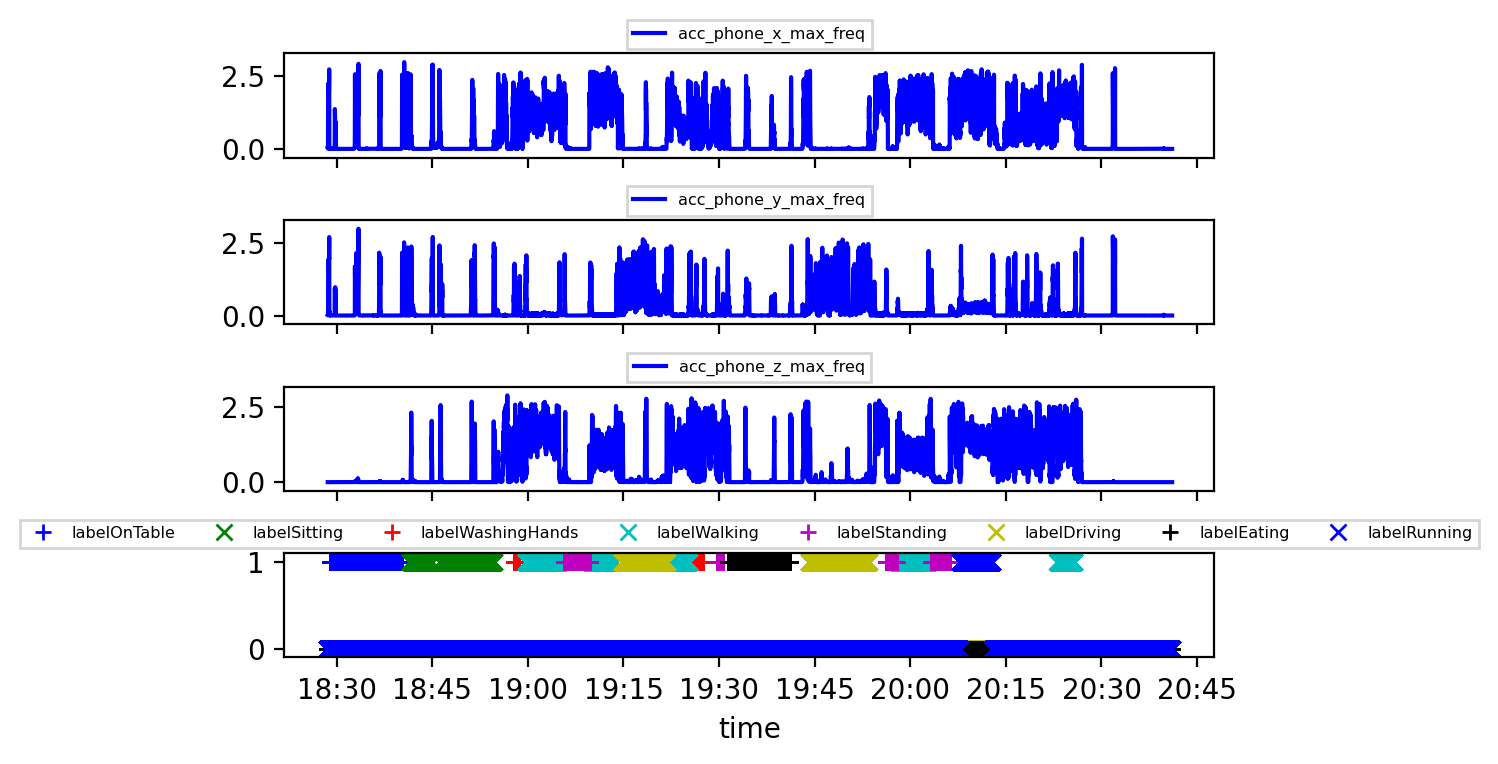

In [17]:
f = plot_frequencies(dataset, ['acc_phone_x_max_freq', 'acc_phone_y_max_freq', 'acc_phone_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title="acc_watch frequencies over all axis")
f

C:\Users\Martin\AppData\Local\Temp\ipykernel_16624\1605468461.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, xar = plt.subplots(len(columns), sharex=True, sharey=False)


['acc_watch_x_max_freq']
['acc_watch_y_max_freq']
['acc_watch_z_max_freq']
['labelOnTable', 'labelSitting', 'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving', 'labelEating', 'labelRunning']


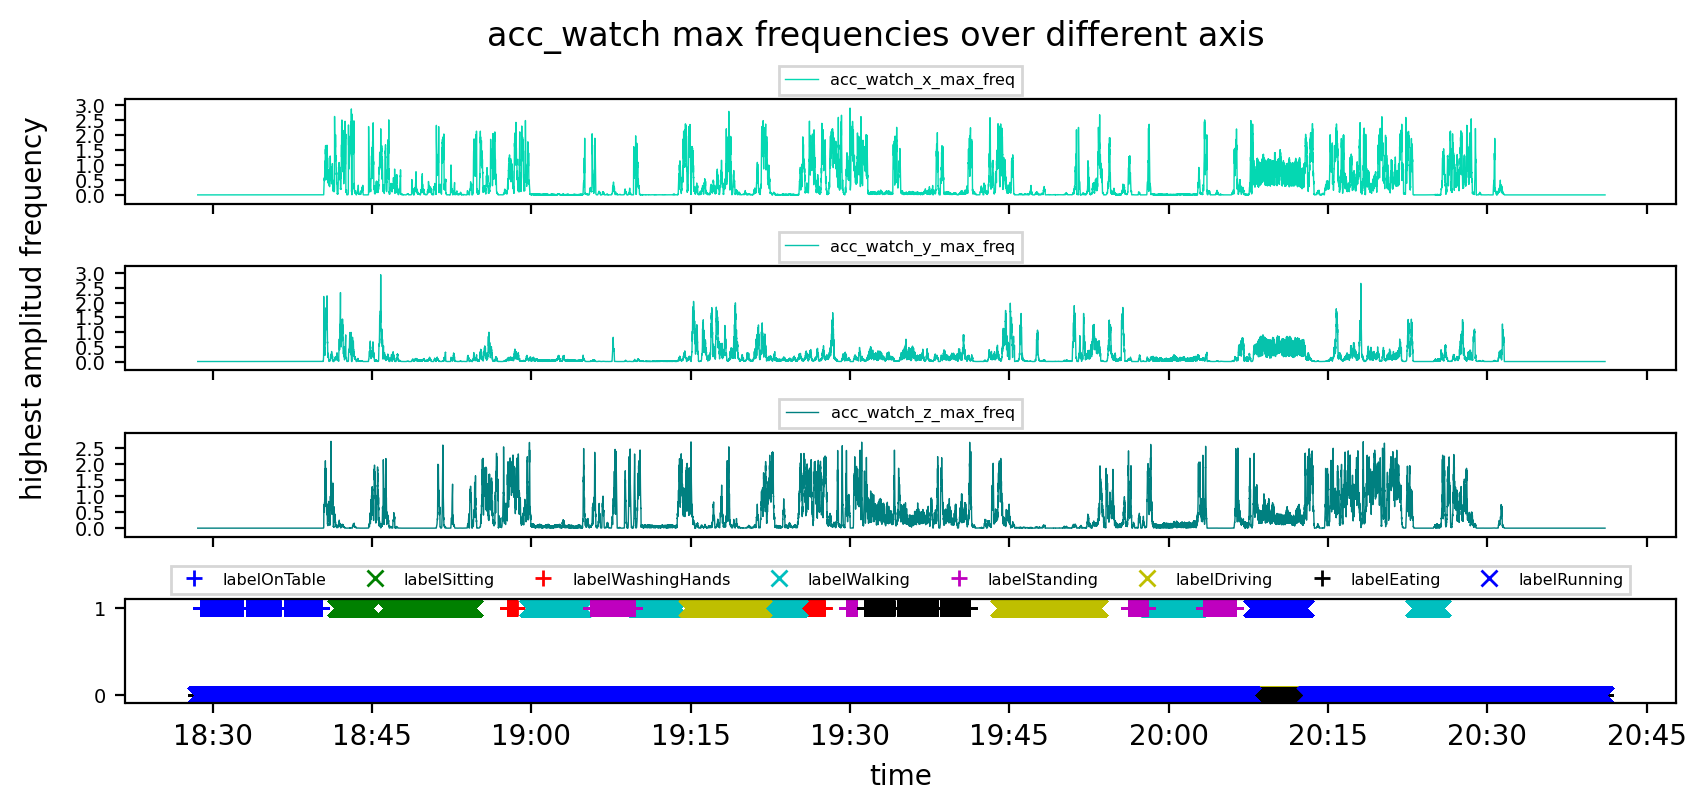

In [232]:
f2 = plot_frequencies(dataset, ['acc_watch_x_max_freq', 'acc_watch_y_max_freq', 'acc_watch_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title="acc_watch max frequencies over different axis")
f2

C:\Users\Martin\AppData\Local\Temp\ipykernel_16624\1605468461.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, xar = plt.subplots(len(columns), sharex=True, sharey=False)


['gyr_phone_x_max_freq']
['gyr_phone_y_max_freq']
['gyr_phone_z_max_freq']
['labelOnTable', 'labelSitting', 'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving', 'labelEating', 'labelRunning']


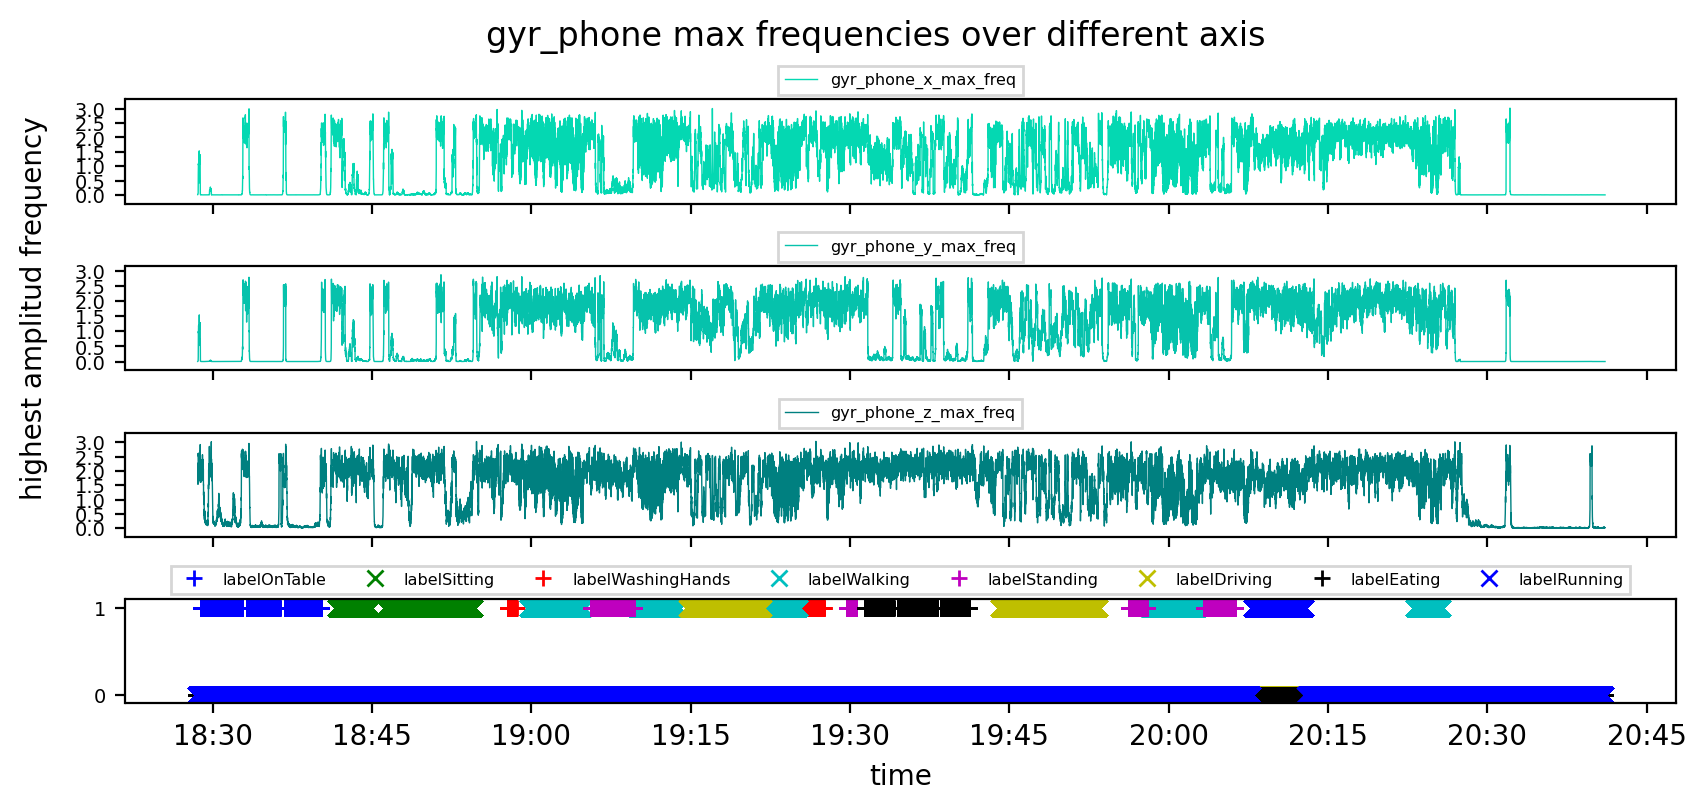

In [235]:
f3 = plot_frequencies(dataset, ['gyr_phone_x_max_freq', 'gyr_phone_y_max_freq', 'gyr_phone_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title='gyr_phone max frequencies over different axis')
f3

C:\Users\Martin\AppData\Local\Temp\ipykernel_16624\1605468461.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, xar = plt.subplots(len(columns), sharex=True, sharey=False)


['acc_phone_z_max_freq']
['acc_watch_z_max_freq']
['gyr_phone_z_max_freq']
['labelOnTable', 'labelSitting', 'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving', 'labelEating', 'labelRunning']


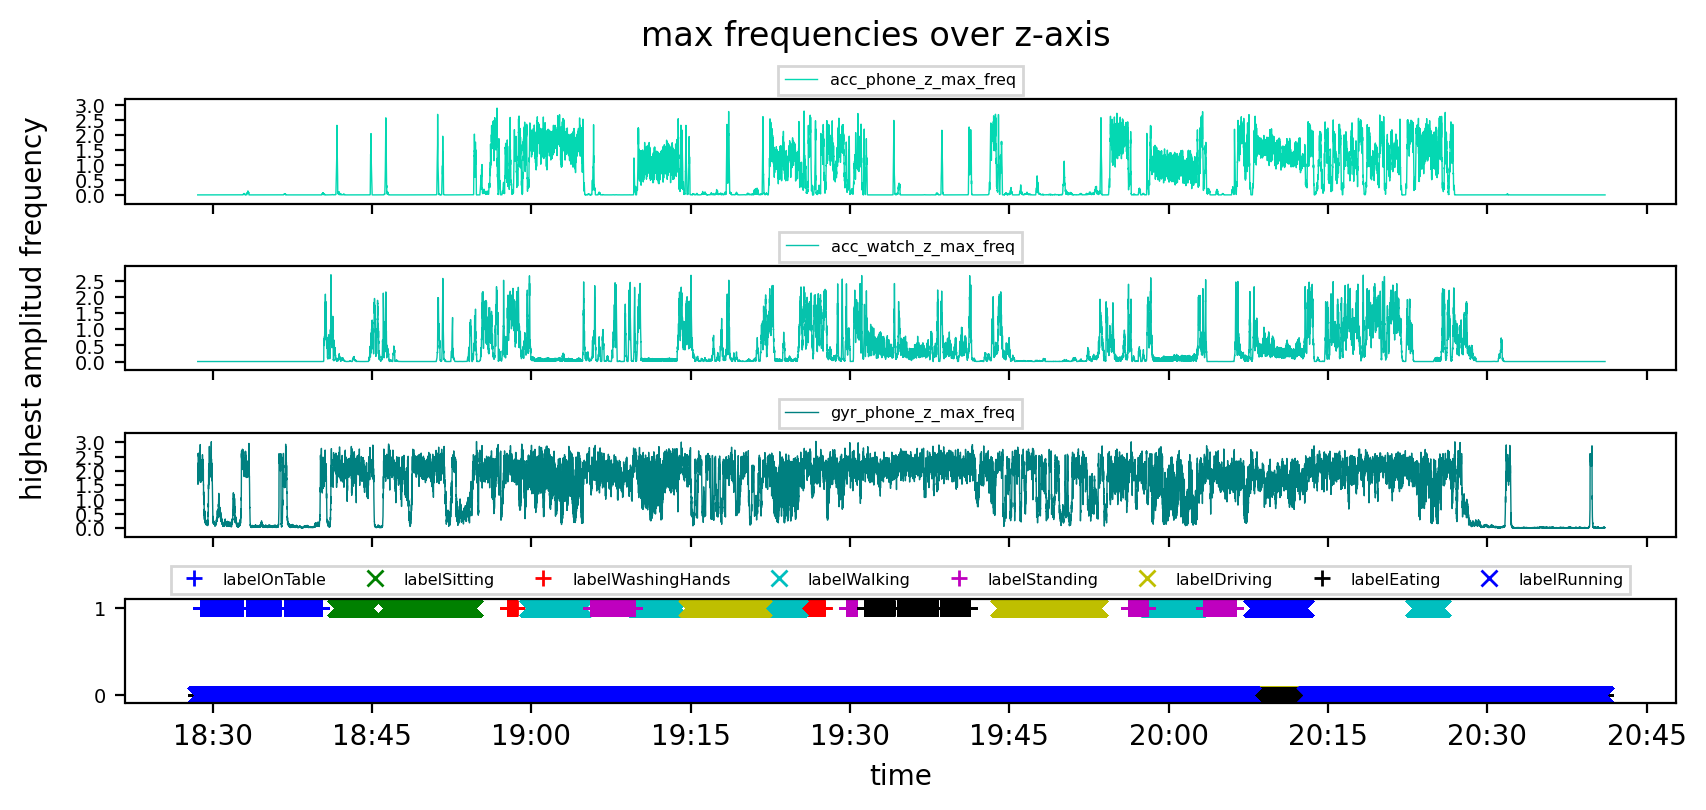

In [237]:
# comparing all Z-freqs
f4 = plot_frequencies(dataset, ['acc_phone_z_max_freq', 'acc_watch_z_max_freq', 'gyr_phone_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title='max frequencies over z-axis')
f4

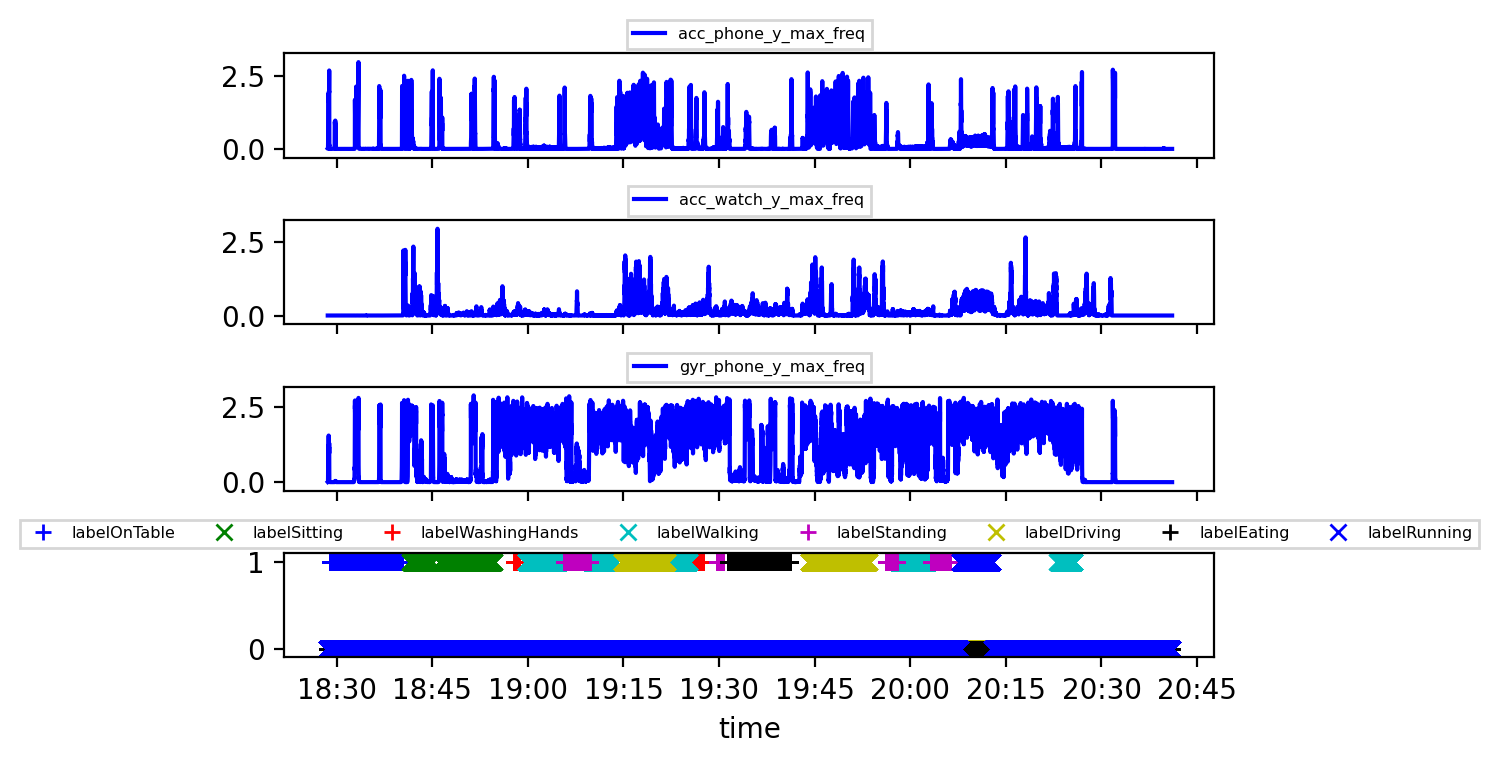

In [22]:
# comparing all y-freqs
f5 = plot_frequencies(dataset, ['acc_phone_y_max_freq', 'acc_watch_y_max_freq', 'gyr_phone_y_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'])
f5

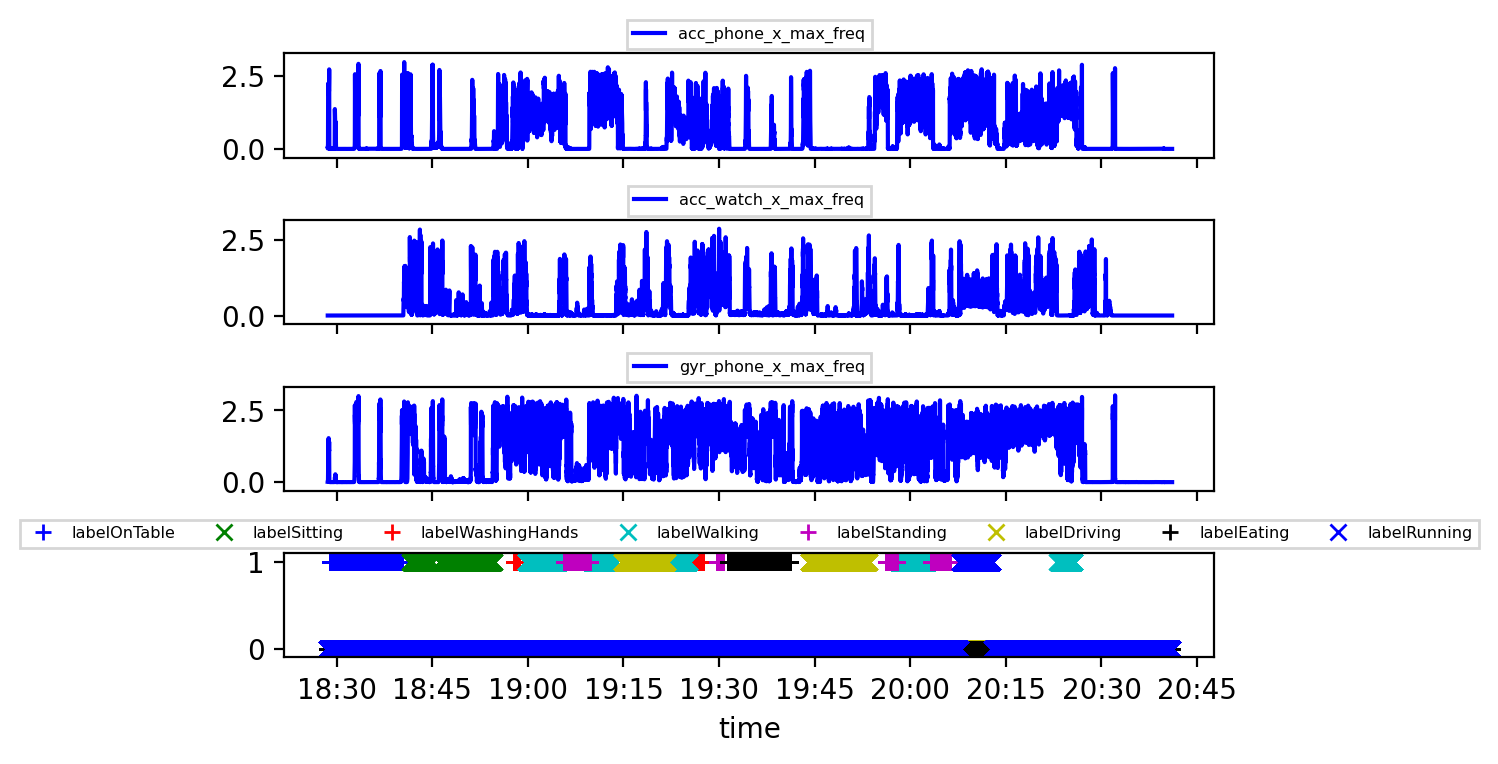

In [25]:
# comparing all x-freqs
f6 = plot_frequencies(dataset, ['acc_phone_x_max_freq', 'acc_watch_x_max_freq', 'gyr_phone_x_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'])
f6

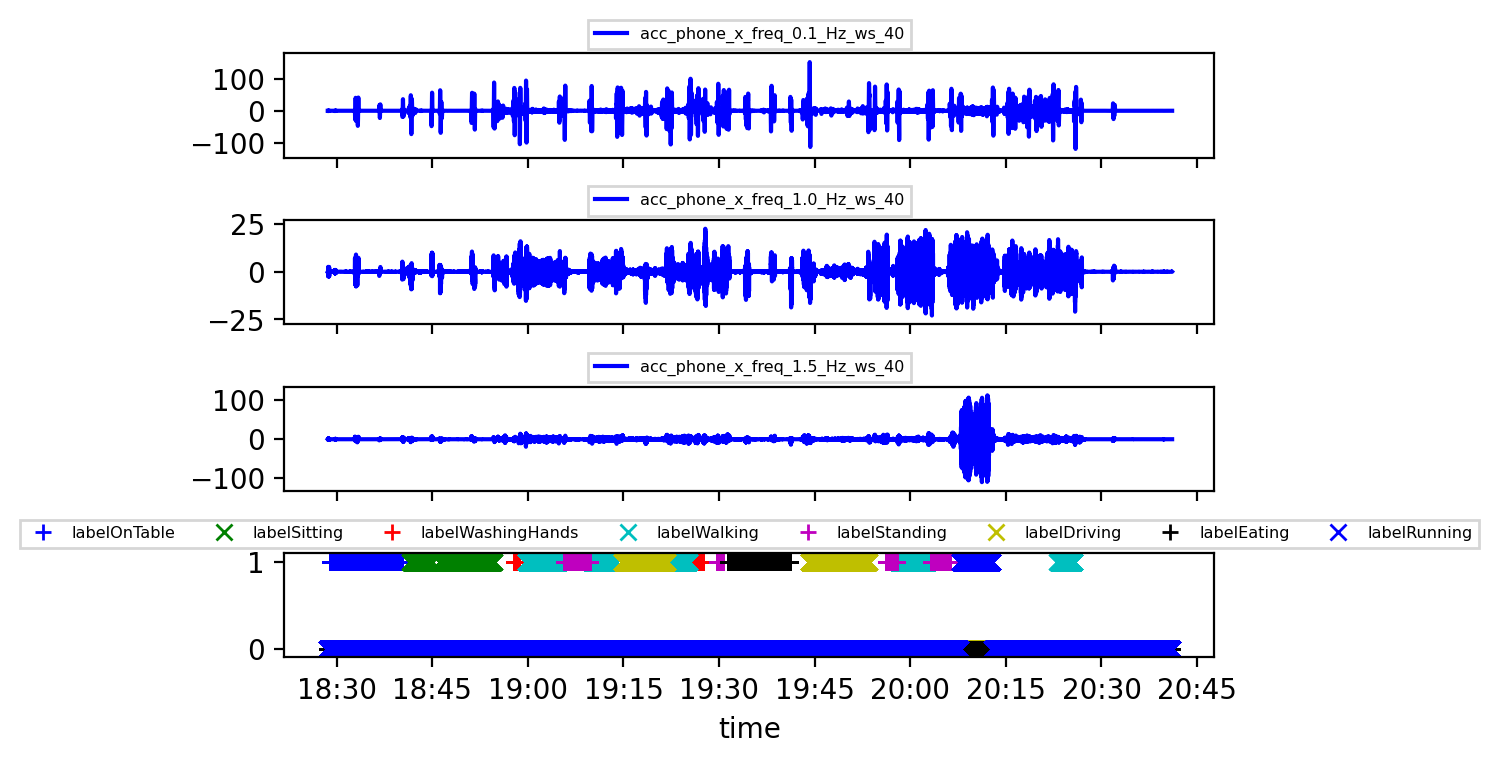

In [33]:
# comparing all x-freqs
#f7 = plot_frequencies(dataset, ['acc_phone_x_freq_0.1_Hz_ws_40', 'acc_phone_x_freq_1.0_Hz_ws_40', 'acc_phone_x_freq_1.5_Hz_ws_40', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'])
#f7

C:\Users\Martin\AppData\Local\Temp\ipykernel_16624\642033613.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, xar = plt.subplots(2, sharex=True, sharey=False)


['acc_watch_x_max_freq', 'acc_watch_y_max_freq', 'acc_watch_z_max_freq']


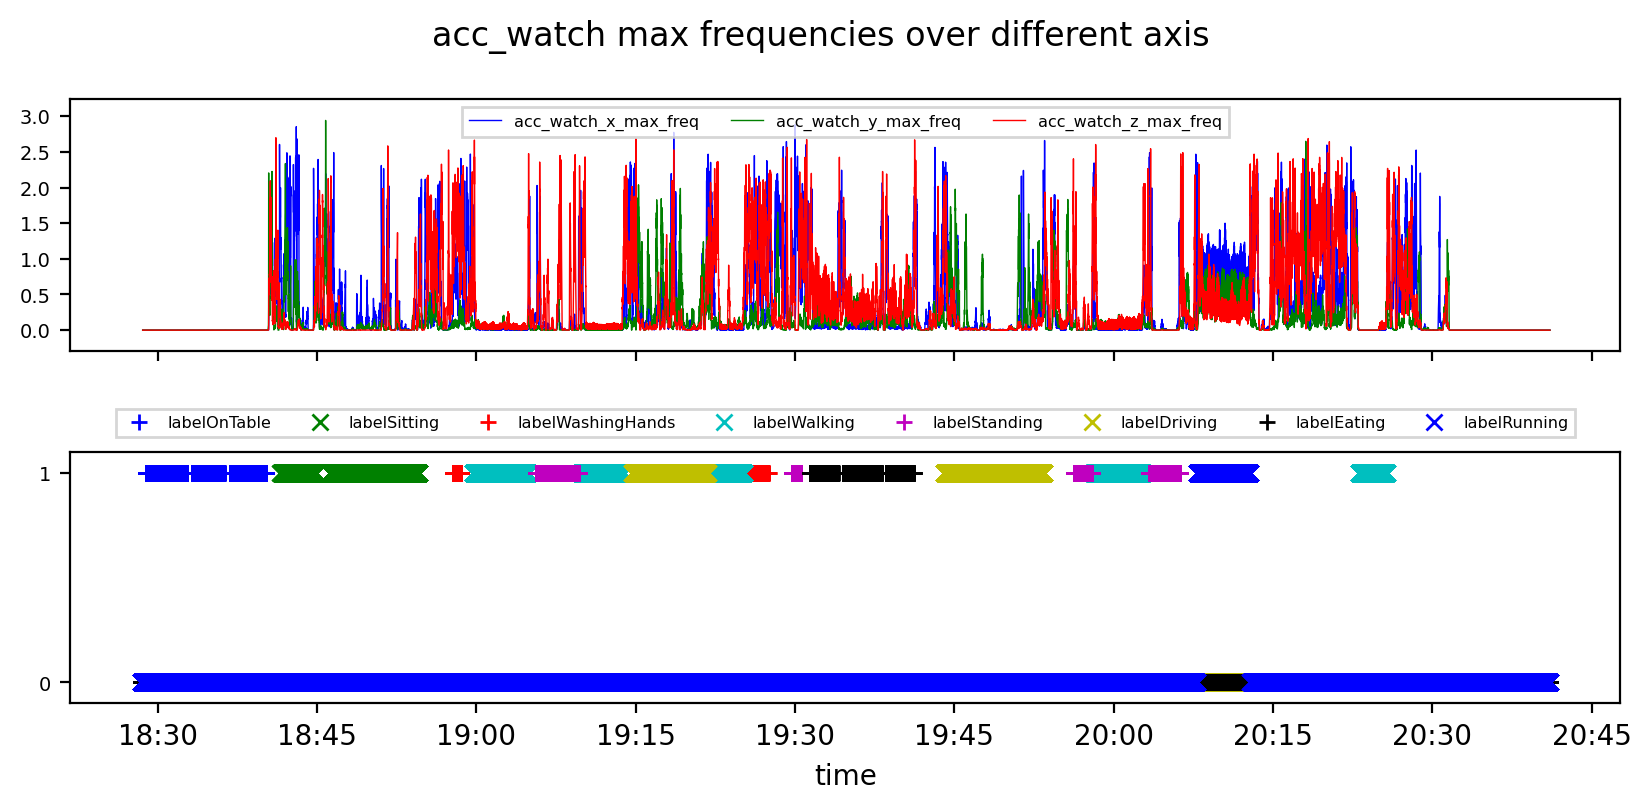

In [154]:
# looks really really bad
f2__ = plot_frequencies222(dataset, ['acc_watch_x_max_freq', 'acc_watch_y_max_freq', 'acc_watch_z_max_freq'], ['like','like', 'like'], ['line','line', 'line'],title="acc_watch max frequencies over different axis")
f2__